In [ ]:
# Importing all the libraries we need for model development
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn import linear_model, metrics

from  sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.preprocessing import StandardScaler, LabelEncoder,OneHotEncoder
from collections import Counter
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline,make_pipeline
from sklearn.manifold import TSNE
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
import os 
import pickle
import random

# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

## **Observing the dataset**

In [ ]:
# Loading titanic data into dataframe
df_load = sns.load_dataset('titanic')
df_load

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


Just by looking the dataset we can conclude various points:-

*   Pclass and Class column both are representing the same information so we can say there is redundancy, since Pclass data is in integer hence we can keep it and remove Class column.
*   Similarly embarked and embark_town here we can remove any one lets say embarked.

*   Similarly survived and alive column here we can remove alive column.
*   Similarly sex and adult_male column here we can remove adult_male column.

*   whenever sibsp and parch is zero ie. whenever the person has no siblings or parents or child he is traveling alone , so we can say alone column is a subset of sibsp and parch column so we can remove alone column also










In [ ]:
df_load['deck'].unique()

[NaN, 'C', 'E', 'G', 'D', 'A', 'B', 'F']
Categories (7, object): ['C', 'E', 'G', 'D', 'A', 'B', 'F']

In [ ]:
df = df_load[[	'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare','embark_town','who','deck', 'survived']]

## **Handling missing dataset**

lets check which column have how many missing data

In [ ]:
df.isnull().sum() 

pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embark_town      2
who              0
deck           688
survived         0
dtype: int64

from this we can conclude some points:-

*   we have total 891 dataset and deck column more than 70% of data missing imputing such large data is not a very good idea hence we will drop deck column
*   embark_town has only 2 missing data since the number is very small removing this 2 row will not affect the dataset hence we wil remove such rows.

*   age column have 177 missing values since the number is not so high not so low we can neither remove rows nor remove column also it is very important feature hence we will ampute null values.

In [ ]:
df = df.dropna(subset = ['embark_town'] )
df = df.drop(columns='deck', axis = 1)

now we have handled embark and deck column lets ampute age column .  
Amputation of numerical values can take place in 2 ways if the distribution of data is normal or there is no significant outliers we can use mean amputation but if there are outliers or data is left or right skewed median amputatation is better. lets check!

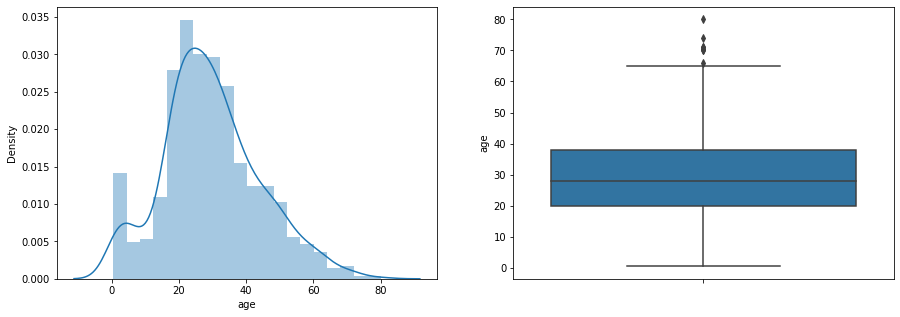

In [ ]:
fig, ax = plt.subplots(1,2, figsize = (15,5))
sns.distplot(df['age'], ax =  ax[0])
sns.boxplot(y = df['age'], ax = ax[1])

As we can see distribution plot of age is slightly left skewed it means there are some outliers ,same thing can be seen in boxplot hence we should use median amputation to handle the missing values of age column.

In [ ]:
df['age'] = df['age'].fillna(df.groupby('pclass')['age'].transform('median') )
df.isnull().sum()

pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embark_town    0
who            0
survived       0
dtype: int64

Hurray!! now we have handled all missing values lets move on to exploratory data analysis(EDA) ie. lets make some visual analysis

**Surival Analysis**

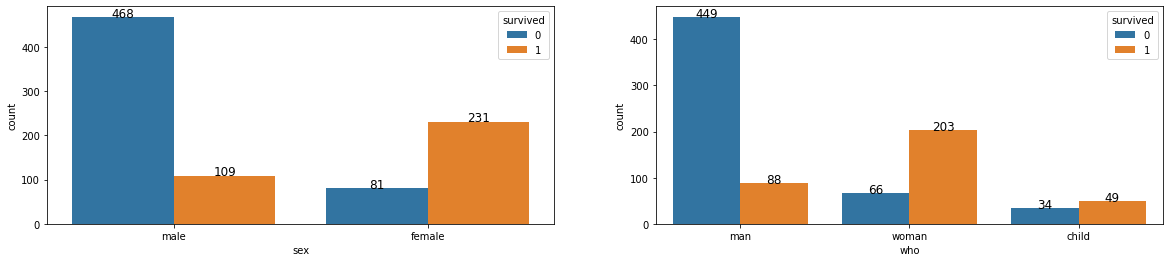

In [ ]:
fig, ax = plt.subplots(1,2,figsize = (20,4))
sns.countplot(data = df, x = 'sex', hue = 'survived', ax = ax[0])
ax[0].legend(title = 'survived',loc='upper right', bbox_to_anchor=(1,1))
for p in ax[0].patches:
    height = p.get_height()
    ax[0].text(p.get_x()+p.get_width()/2., height + 0.1,height ,ha="center" ,color = 'Black',fontsize = 12)
    
sns.countplot(data = df, x = 'who', hue = 'survived', ax = ax[1])
ax[1].legend(title = 'survived',loc='upper right', bbox_to_anchor=(1,1))
for p in ax[1].patches:
    height = p.get_height()
    ax[1].text(p.get_x()+p.get_width()/2., height + 0.1,height ,ha="center" ,color = 'Black',fontsize = 12)


*   this  count plot shows that only 109 males survived on the other side 233 females have survived which is 2 times of males survived
also it shows that only 81 females died  on the other side 468 males died which is 6 times of females died.

*   Also we can see countplot of man, woman and child where we can see more than 50% of people died are man  where survival rate of woman and child are more than death rate.



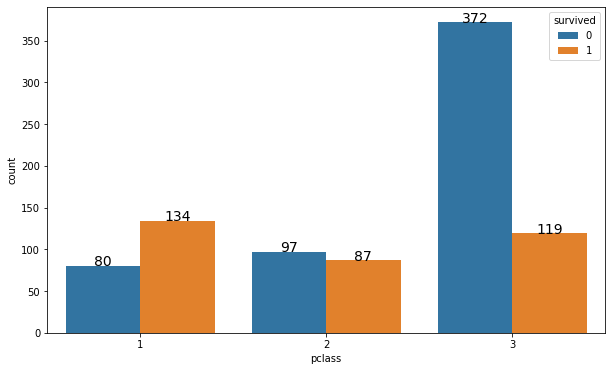

In [ ]:
plt.figure(figsize = (10,6))
ax = sns.countplot(data = df, x = 'pclass', hue = 'survived',)
for p in ax.patches:
  height = p.get_height()
  ax.text(p.get_x()+p.get_width()/2., height + .1,height ,ha="center" ,color = 'Black',fontsize = 14)

this count plot shows that in class 3 more people have died than class 1&2 
also in class 1 more people have survived than class 2&3

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


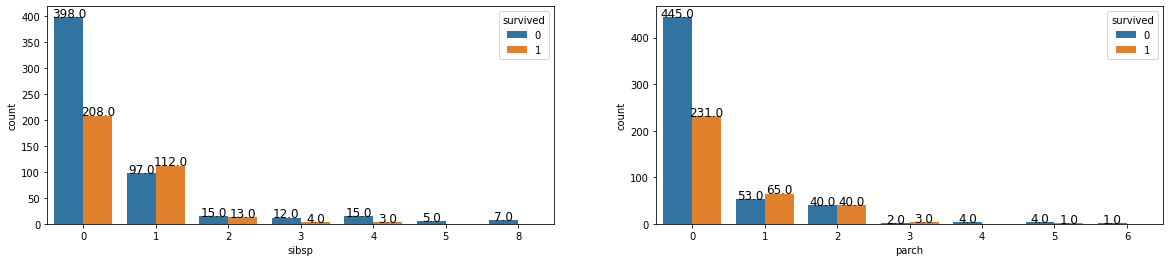

In [ ]:
fig, ax = plt.subplots(1,2,figsize = (20,4))
sns.countplot(data = df, x = 'sibsp', hue = 'survived', ax = ax[0])
ax[0].legend(title = 'survived',loc='upper right', bbox_to_anchor=(1,1))
for p in ax[0].patches:
    height = p.get_height()
    ax[0].text(p.get_x()+p.get_width()/2., height + 0.1,height ,ha="center" ,color = 'Black',fontsize = 12)
    
sns.countplot(data = df, x = 'parch', hue = 'survived', ax = ax[1])
ax[1].legend(title = 'survived',loc='upper right', bbox_to_anchor=(1,1))
for p in ax[1].patches:
    height = p.get_height()
    ax[1].text(p.get_x()+p.get_width()/2., height + 0.1,height ,ha="center" ,color = 'Black',fontsize = 12)



*   Here we can see the no. of siblings aboarded the ship from each family and people with no siblings are likely to be less survived than people with 1 or more siblings.
*   similarly we can see people with children or parents aboarded and people with no children or parents are likely to be less survived than people with with 1 or more children or parents.
 

<Figure size 720x504 with 0 Axes>

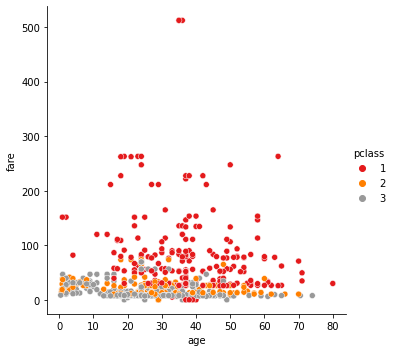

In [ ]:
plt.figure(figsize = (10,7))
sns.relplot(data=df, y='fare', x = 'age',hue = 'pclass', palette = plt.cm.Set1 )

This scatter plot shows that class 1 fares are higher than 2&3 but class 3 
fares are highly varible for range of ages than class 2&3 fares where fares are mostly stable and const for ranges of ages

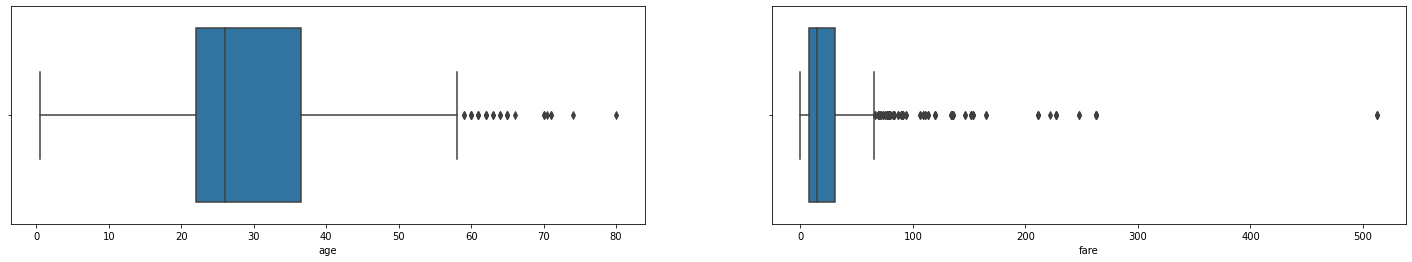

In [ ]:
fig, ax = plt.subplots(1,2,figsize = (25,4))
sns.boxplot(data = df , x = df['age'], ax = ax[0])
sns.boxplot(data = df , x = df['fare'], ax = ax[1])

In this plot we can see that both have enough ouliers but there are more outliers in fare than age.

## **Converting Category values**

In [ ]:
df.head()

,pclass,sex,age,sibsp,parch,fare,embark_town,who,survived
0,3,male,22.0,1,0,7.2500,Southampton,man,0
1,1,female,38.0,1,0,71.2833,Cherbourg,woman,1
2,3,female,26.0,0,0,7.9250,Southampton,woman,1
3,1,female,35.0,1,0,53.1000,Southampton,woman,1
4,3,male,35.0,0,0,8.0500,Southampton,man,0




*   Since sex, embark_town and who column have categorical values we will convert them into binary vectors using  get dummies .

*  Also we are converting Pclass into binary vector although it is numerical value, since that value is not ordinal means pclass 1 is not less than pclass 3 both have no relation hence we need to categories them into binary vectors.



In [ ]:
df_cat = pd.get_dummies(df, columns= ['sex','embark_town','pclass','who'])
df_cat.head()

,age,sibsp,parch,fare,survived,sex_female,sex_male,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton,pclass_1,pclass_2,pclass_3,who_child,who_man,who_woman
0,22.0,1,0,7.2500,0,0,1,0,0,1,0,0,1,0,1,0
1,38.0,1,0,71.2833,1,1,0,1,0,0,1,0,0,0,0,1
2,26.0,0,0,7.9250,1,1,0,0,0,1,0,0,1,0,0,1
3,35.0,1,0,53.1000,1,1,0,0,0,1,1,0,0,0,0,1
4,35.0,0,0,8.0500,0,0,1,0,0,1,0,0,1,0,1,0


## **Preparing Data**

In [ ]:
# Seperating the data and target variable
label = df_cat['survived'].values
data = df_cat.drop(columns = 'survived').values

In [ ]:
Counter(label)

Counter({0: 549, 1: 340})

In [ ]:
over = SMOTE(random_state=42)
data_over, label_over = over.fit_resample(data,label)

In [ ]:
Counter(label_over)

Counter({0: 549, 1: 549})

In [ ]:
# dividing the data into 80-20 train test dataset
x_train, x_test, y_train, y_test = train_test_split(data_over,label_over, test_size = .3, random_state = 42)

In [ ]:
# stadardising the dataset to remove the scaling factor
std = StandardScaler()
x_train_std = std.fit_transform(x_train)
x_test_std = std.transform(x_test)

## **Data Prediction**

In [ ]:
knn = KNeighborsClassifier()
log = LogisticRegression(random_state=42)
svc_rbf = SVC(random_state=42)
gnb = GaussianNB()
tree = DecisionTreeClassifier(random_state=42)
forest = RandomForestClassifier(random_state=42)

In [ ]:
classifier = [knn, log, svc_rbf, gnb, tree, forest] 
for item in classifier:
  item.fit(x_train_std,y_train)
  y_true =  y_train
  y_pred = item.predict(x_train_std)
  print(f'the model is {item} ')
  print(f'Accuracy : {metrics.accuracy_score(y_true, y_pred)}, F1-score : {metrics.f1_score(y_true,y_pred)}, roc_auc : {metrics.roc_auc_score(y_true,y_pred)}')

the model is KNeighborsClassifier() 
Accuracy : 0.8723958333333334, F1-score : 0.8696808510638296, roc_auc : 0.8726118537508393
the model is LogisticRegression(random_state=42) 
Accuracy : 0.8151041666666666, F1-score : 0.8091397849462366, roc_auc : 0.8153980752405949
the model is SVC(random_state=42) 
Accuracy : 0.8307291666666666, F1-score : 0.8204419889502762, roc_auc : 0.8312274919123481
the model is GaussianNB() 
Accuracy : 0.78515625, F1-score : 0.7785234899328859, roc_auc : 0.7854381574396223
the model is DecisionTreeClassifier(random_state=42) 
Accuracy : 0.9869791666666666, F1-score : 0.9869791666666666, roc_auc : 0.987039410771328
the model is RandomForestClassifier(random_state=42) 
Accuracy : 0.9869791666666666, F1-score : 0.987012987012987, roc_auc : 0.9870190644774055


In [ ]:
classifier = [knn, log,  svc_rbf, gnb, tree, forest] 
for item in classifier:
  item.fit(x_train_std,y_train)
  y_true =  y_test
  y_pred = item.predict(x_test_std)
  print(f'the model is {item} ')
  print(f'Accuracy : {metrics.accuracy_score(y_true, y_pred)}, F1-score : {metrics.f1_score(y_true,y_pred)}, roc_auc : {metrics.roc_auc_score(y_true,y_pred)}')

the model is KNeighborsClassifier() 
Accuracy : 0.8333333333333334, F1-score : 0.8318042813455657, roc_auc : 0.8334435626102292
the model is LogisticRegression(random_state=42) 
Accuracy : 0.8181818181818182, F1-score : 0.8159509202453987, roc_auc : 0.818231922398589
the model is SVC(random_state=42) 
Accuracy : 0.8303030303030303, F1-score : 0.8227848101265822, roc_auc : 0.8298059964726632
the model is GaussianNB() 
Accuracy : 0.8272727272727273, F1-score : 0.817891373801917, roc_auc : 0.8266093474426808
the model is DecisionTreeClassifier(random_state=42) 
Accuracy : 0.8424242424242424, F1-score : 0.8424242424242424, roc_auc : 0.8427028218694884
the model is RandomForestClassifier(random_state=42) 
Accuracy : 0.8151515151515152, F1-score : 0.8200589970501475, roc_auc : 0.8159171075837743


performance measures on train data shows that  decision tree and random forest perform better 

performance measures on test data shows that decision tree  perform better but
 hence we go with decision tree model

In [ ]:
param = { 'criterion' : ['gini', 'entropy'],
           'max_depth' : [2,4,6,8,10,12],
            "max_features": [1,3,5,7,9,11,13],
            "min_samples_leaf": [2,3,4] }
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
# Create a based model
svc_rbf = DecisionTreeClassifier(random_state=42)
# Instantiate the grid search model
grid = GridSearchCV(estimator = svc_rbf, param_grid = param, 
                          cv = cv,  scoring = 'accuracy')
grid.fit(x_train_std,y_train)
print(grid.best_params_)
grid.best_score_

{'criterion': 'entropy', 'max_depth': 6, 'max_features': 7, 'min_samples_leaf': 3}


0.8411141490088859

In [ ]:
# grid.fit(x_train_std,y_train)
y_true =  y_test
y_pred = grid.predict(x_test_std)
print(f'Accuracy : {metrics.accuracy_score(y_true, y_pred)}, F1-score : {metrics.f1_score(y_true,y_pred)}, roc_auc : {metrics.roc_auc_score(y_true,y_pred)}')

Accuracy : 0.8212121212121212, F1-score : 0.8259587020648967, roc_auc : 0.821979717813051


Since data was highly imbalanced hence we are using f1_score and roc curve parameters for performance


1st graph shows the metrics parameters ie. precision, recall and f1_score and the 2nd graph shows roc_auc curve and its value


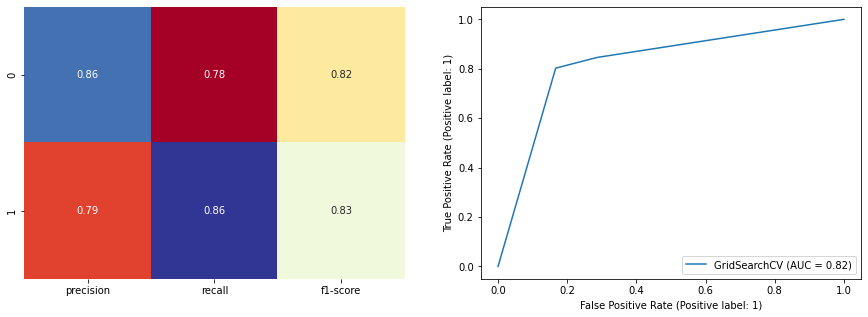

In [ ]:
fig , ax = plt.subplots(1,2, figsize = (15,5))
report = metrics.classification_report(y_true, y_pred, output_dict=True, target_names=set(label))
sns.heatmap(pd.DataFrame(report).iloc[:-1,:-3].T,  cmap = plt.cm.RdYlBu, cbar = False , annot=True, ax = ax[0])
metrics.plot_roc_curve(grid,x_test,y_test, ax = ax[1])

In order to check how our model performs on tst data we can plot confusion matrix where diagonal values are correctly classified datasets


Text(0.5, 1.0, 'Actual vs predicted value on test data')

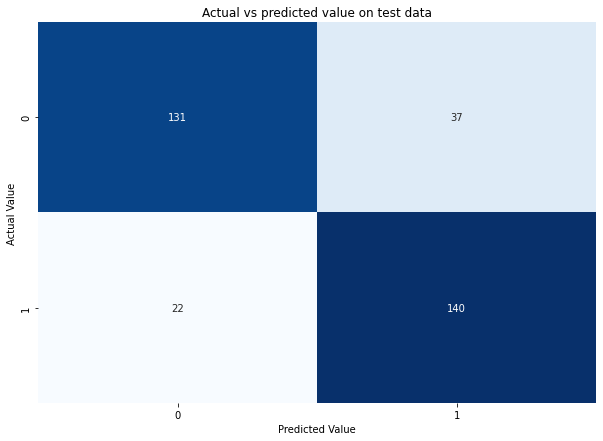

In [ ]:
cm = metrics.confusion_matrix(y_true, y_pred)
plt.figure(figsize = (10,7))
sns.heatmap(cm, xticklabels=set(label), yticklabels=set(label), fmt= 'd', cmap = plt.cm.Blues, cbar = False , annot=True)
plt.ylabel('Actual Value')
plt.xlabel('Predicted Value')
plt.title('Actual vs predicted value on test data')

In order to visualize decision decision tree here we are reducing the dimension of data into 2 features so that we can use meshplot


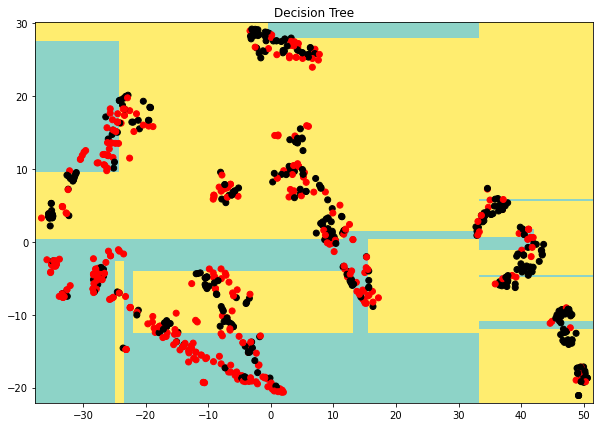

In [ ]:
x = TSNE(n_components=2, random_state= 42).fit_transform(x_train)
clf = DecisionTreeClassifier(criterion= 'entropy', max_depth = 6, min_samples_leaf = 3,random_state=42)
clf.fit(x,y_train)

x_min,x_max = x[:,0].min()-1, x[:,0].max()+1
y_min,y_max = x[:,1].min()-1, x[:,1].max()+1
h = .09
xx,yy = np.meshgrid(np.arange(x_min,x_max,h),np.arange(y_min,y_max,h))

Z = clf.predict(np.c_[xx.ravel(),yy.ravel()])

plt.figure(figsize = (10,7))
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx,yy,Z,cmap = plt.cm.Set3)

# scatterplot for data points
plt.scatter(x[:,0],x[:,1], c =y_train, cmap = plt.cm.flag)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("Decision Tree")
plt.show()

## **Model Deployment Procedure**

Whatever we have done above, in order to deploy it we need to make a pipeline where whole procedure happens in one go so lets make it!

In [ ]:
df.head()

,pclass,sex,age,sibsp,parch,fare,embark_town,who,survived
0,3,male,22.0,1,0,7.2500,Southampton,man,0
1,1,female,38.0,1,0,71.2833,Cherbourg,woman,1
2,3,female,26.0,0,0,7.9250,Southampton,woman,1
3,1,female,35.0,1,0,53.1000,Southampton,woman,1
4,3,male,35.0,0,0,8.0500,Southampton,man,0


In [ ]:
lb = df['survived'].values
dt = df.drop(columns='survived').values
X_train,X_test,Y_train,Y_test = train_test_split(dt,lb,test_size=.3,random_state=42)

In [ ]:
X_train

array([[1, 'female', 35.0, ..., 90.0, 'Southampton', 'woman'],
       [3, 'female', 24.0, ..., 8.85, 'Southampton', 'woman'],
       [3, 'male', 21.0, ..., 7.925, 'Southampton', 'man'],
       ...,
       [1, 'female', 48.0, ..., 25.9292, 'Southampton', 'woman'],
       [3, 'female', 21.0, ..., 34.375, 'Southampton', 'woman'],
       [3, 'male', 33.0, ..., 8.6542, 'Southampton', 'man']], dtype=object)

In [ ]:
# define model
model = DecisionTreeClassifier(criterion= 'entropy', max_depth = 6, min_samples_leaf = 3,max_features = 7,random_state=42)
# define transform
transformer = ColumnTransformer(transformers=[('cat', OneHotEncoder(handle_unknown = 'ignore'), [0,1, 6,7])])
# define pipeline
pipe = Pipeline(steps=[('t', transformer),('o', over), ('s', std),('m',model)])
# fit the pipeline on the transformed data
pipe.fit(X_train, Y_train)

Pipeline(steps=[('t',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  [0, 1, 6, 7])])),
                ('o', SMOTE(random_state=42)), ('s', StandardScaler()),
                ('m',
                 DecisionTreeClassifier(criterion='entropy', max_depth=6,
                                        max_features=7, min_samples_leaf=3,
                                        random_state=42))])

In [ ]:
pickle.dump(pipe, open('/content/drive/MyDrive/ML/ML Projects/Titanic Survival/titanic_survival.pkl','wb'))

In [ ]:
model = pickle.load(open('/content/drive/MyDrive/ML/ML Projects/Titanic Survival/titanic_survival.pkl','rb'))

In [ ]:
X_test[30].reshape(1,-1).shape

(1, 8)

In [ ]:
# model.predict(X_test[30].reshape(1,-1))
if model.predict(X_test[40].reshape(1,-1))[0] == 0:
  print('ohh!! no , this person didn\'t survived')
else:
  print('congrats!!! this person survived titanic incident')

ohh!! no , this person didn't survived
